In [21]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='Species')

# Display the first few rows of the DataFrame
print(X.head())

# Obtain a statistical summary of the dataset
print(X.describe())

# Use .info() to identify columns with missing values
print(X.info())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000

In [22]:
# Check for missing (NaN) values in the dataset
missing_values = X.isna().sum()
print(missing_values)

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize a decision tree classifier
tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [24]:
from sklearn.metrics import classification_report

# Predict on the test data
y_pred = tree_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



使用【Graphviz】

In [25]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz

# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the decision tree classifier
tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train, y_train)

# Export the decision tree to a DOT file for use with Graphviz
dot_file = "1-iris_tree.dot"
export_graphviz(tree_classifier, out_file=dot_file,
                feature_names=iris.feature_names,
                class_names=iris.target_names.tolist(),
                filled=True)

# The path to the DOT file
print(f"The DOT file has been saved as: {dot_file}")


The DOT file has been saved as: 1-iris_tree.dot


使用【plot_tree】

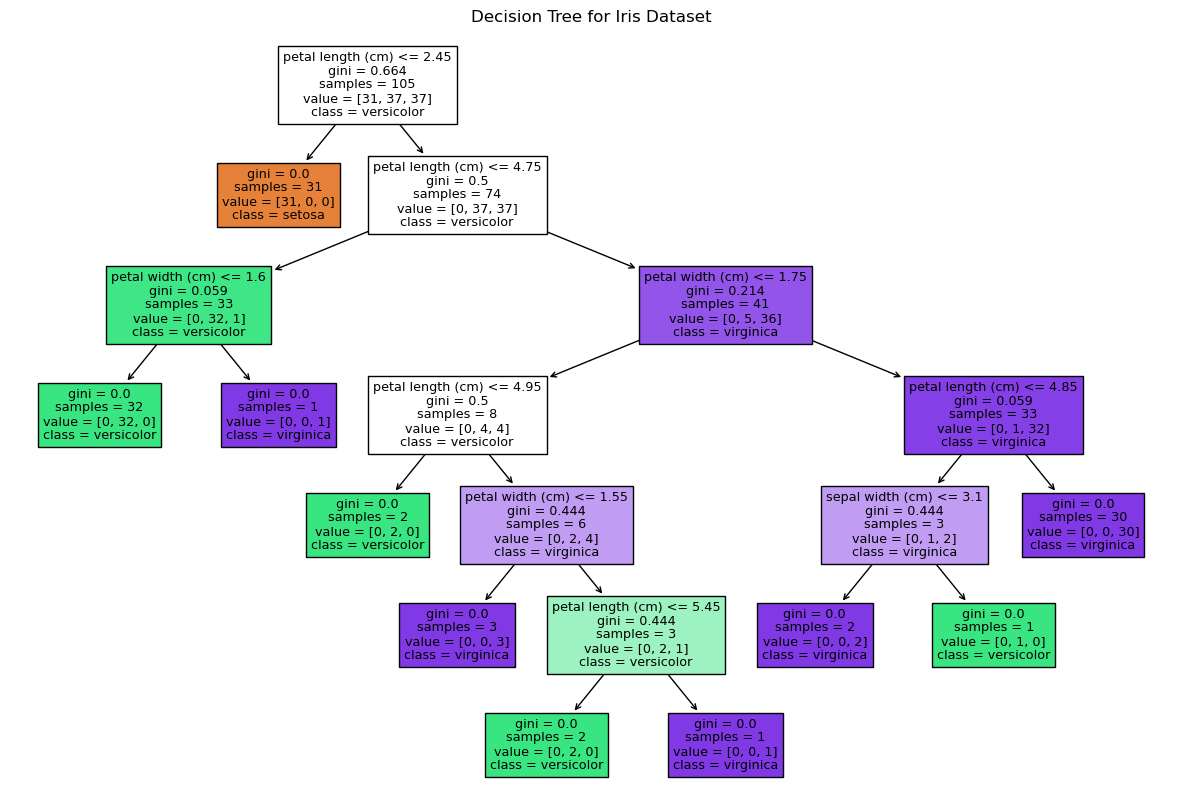

In [26]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the decision tree
plt.figure(figsize=(15,10))
# Convert class names to list
class_names_list = iris.target_names.tolist()
plot_tree(tree_classifier, filled=True, feature_names=iris.feature_names, class_names=class_names_list)
plt.title("Decision Tree for Iris Dataset")
plt.show()

使用 【pydotplus】。【dtreeviz】一直報錯

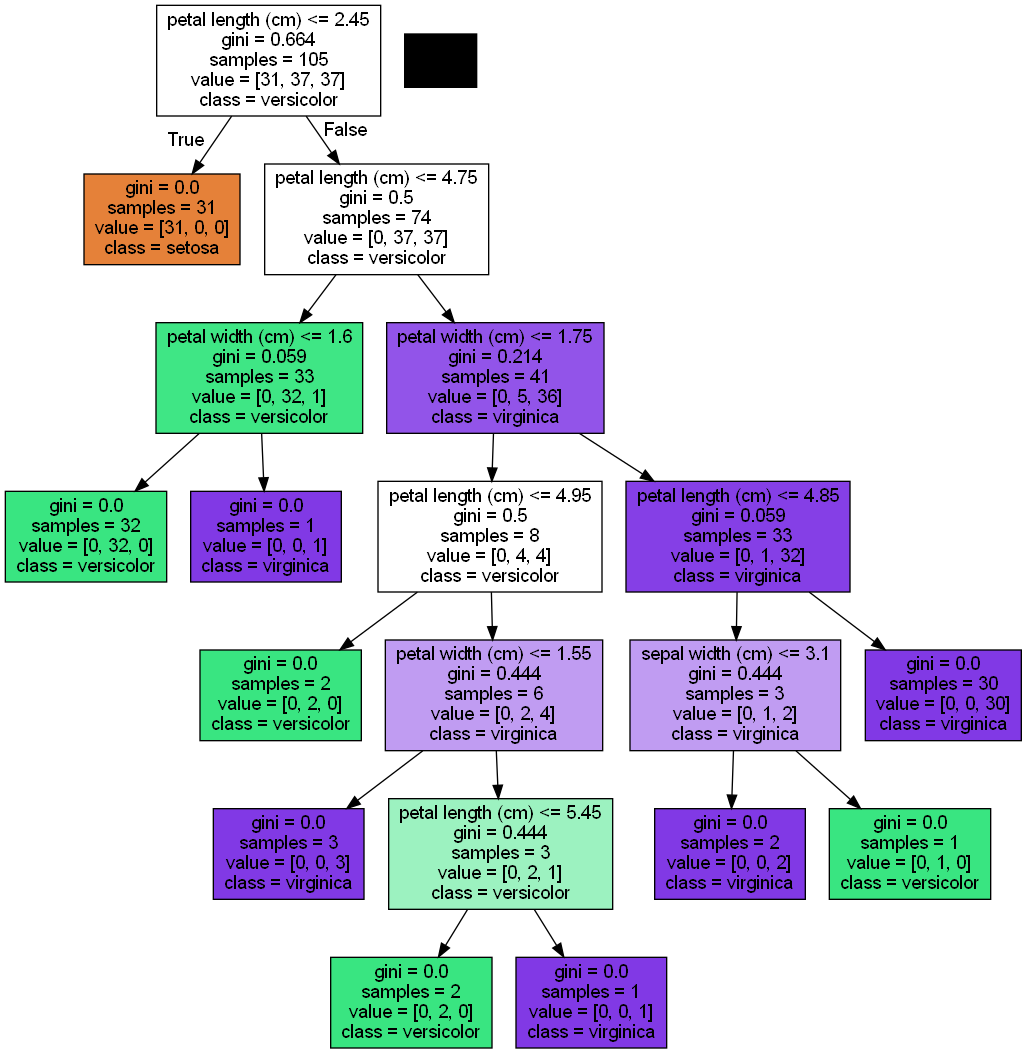

In [27]:
import pydotplus
from IPython.display import Image

# 使用 pydotplus 從 .dot 文件讀取並創建圖像
graph = pydotplus.graph_from_dot_file(dot_file)
Image(graph.create_png())